# What sells a car?

You're an analyst at Crankshaft List. Hundreds of free advertisements for vehicles are published on your site every day. You need to study data collected over the last few years and determine which factors influence the price of a vehicle.

[We've provided you with some commentary to guide your thinking as you complete this project. However, make sure to remove all the bracketed comments before submitting your project.]

[Before you dive into analyzing your data, explain yourself the purposes of the project and actions you plan to take.]

[Please bear in mind that studying, amending and analyzing data is an iterative process. It is normal to return back to previous steps and correct/expand them to allow for further steps.]

## Initialization

In [1]:
# Load libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from datetime import timedelta

### Load data

In [2]:
# Load data
try:
    df = pd.read_csv('vehicles_us.csv')
except:
    df = pd.read_csv('datasets/vehicles_us.csv')

In [3]:
#Test if the CSV loaded correctly
display(df.head(15))

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,1.0,2018-06-23,19
1,25500,NaN,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,NaN,2019-02-07,79
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,NaN,NaN,2019-03-22,9
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,NaN,2019-04-02,28
5,14990,2014.0,chrysler 300,excellent,6.0,gas,57954.0,automatic,sedan,black,1.0,2018-06-20,15
6,12990,2015.0,toyota camry,excellent,4.0,gas,79212.0,automatic,sedan,white,NaN,2018-12-27,73
7,15990,2013.0,honda pilot,excellent,6.0,gas,109473.0,automatic,SUV,black,1.0,2019-01-07,68
8,11500,2012.0,kia sorento,excellent,4.0,gas,104174.0,automatic,SUV,NaN,1.0,2018-07-16,19
9,9200,2008.0,honda pilot,excellent,NaN,gas,147191.0,automatic,SUV,blue,1.0,2019-02-15,17


### Explore initial data

The dataset contains the following fields:
- `price`
- `model_year`
- `model`
- `condition`
- `cylinders`
- `fuel` — gas, diesel, etc.
- `odometer` — the vehicle's mileage when the ad was published
- `transmission`
- `paint_color`
- `is_4wd` — whether the vehicle has 4-wheel drive (Boolean type)
- `date_posted` — the date the ad was published
- `days_listed` — from publication to removal

In [4]:
# print the general/summary information about the DataFrame
display(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         51525 non-null  int64  
 1   model_year    47906 non-null  float64
 2   model         51525 non-null  object 
 3   condition     51525 non-null  object 
 4   cylinders     46265 non-null  float64
 5   fuel          51525 non-null  object 
 6   odometer      43633 non-null  float64
 7   transmission  51525 non-null  object 
 8   type          51525 non-null  object 
 9   paint_color   42258 non-null  object 
 10  is_4wd        25572 non-null  float64
 11  date_posted   51525 non-null  object 
 12  days_listed   51525 non-null  int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 5.1+ MB


None

In [5]:
df.describe()

,price,model_year,cylinders,odometer,is_4wd,days_listed
count,51525.000000,47906.000000,46265.000000,43633.000000,25572.0,51525.00000
mean,12132.464920,2009.750470,6.125235,115553.461738,1.0,39.55476
std,10040.803015,6.282065,1.660360,65094.611341,0.0,28.20427
min,1.000000,1908.000000,3.000000,0.000000,1.0,0.00000
25%,5000.000000,2006.000000,4.000000,70000.000000,1.0,19.00000
50%,9000.000000,2011.000000,6.000000,113000.000000,1.0,33.00000
75%,16839.000000,2014.000000,8.000000,155000.000000,1.0,53.00000
max,375000.000000,2019.000000,12.000000,990000.000000,1.0,271.00000


[Describe what you notice in the general information and the printed data sample. Are there any issues that may need further investigation and changes?]

In [6]:
### Data Type
# date_posted should probably be a date type, not an object.
# model_year should be an int not a float

In [7]:
df.isna().sum()

price               0
model_year       3619
model               0
condition           0
cylinders        5260
fuel                0
odometer         7892
transmission        0
type                0
paint_color      9267
is_4wd          25953
date_posted         0
days_listed         0
dtype: int64

In [8]:
#filter a NaN only table
df_nan = df[df.isna().any(axis=1)]
df_nan.head(5)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,1.0,2018-06-23,19
1,25500,NaN,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,NaN,2019-02-07,79
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,NaN,NaN,2019-03-22,9
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,NaN,2019-04-02,28


In [9]:
### NaN
# Quite a few NaN entries in the data
# 25k missing data points on 4wd ! 
# That's almost half of the data set!

# Looking closer at 4wd, It looks like the Nan values should actually be zeros. 
# Let's take a closer look.

In [10]:
print(df.is_4wd.value_counts())
print(df.is_4wd.isna().sum())

1.0    25572
Name: is_4wd, dtype: int64
25953


In [11]:
# Yep, 1's and NaN. Should be 1's and 0's.
# We'll add that too our list.

### Conclusions and further steps

[Formulate your conclusions regarding the initial data. What do you think looks normal and what does not not?]

[Explain your next steps and how they correlate with the conclusions you made so far. Specifically, it should be clear what part of data should be treated to make it more suitable for the required analysis.]

In [12]:
### Data Type
# date_posted should probably be a date type, not an object.
# model_year should be an int not a float

#NaN
# 4wd will convert NaN to 0
# model_year, cylinders, odometer, paint_color are going to be more difficult.

## Treat missing values (if any)

In [13]:
# Convert 4wd NaN to 0
df['is_4wd'] = df['is_4wd'].fillna(0)

In [14]:
#Test
df['is_4wd'].isna().sum()

0

In [15]:
#filter a NaN only table
df_nan_2 = df[df.isna().any(axis=1)]
#df_nan_2.head()

#Copy our DataFrame
data = df
data_test = df

In [16]:
# Def function to solve for NaN values in model_year

def cal_model_median(row):
    """
    Based on model, return a median model_yaer.
    
    """

    model = row['model']
    try: 
        median_value = data[(data['model'] == model)].median()
        return median_value
    except:
        return
    

In [17]:
#apply the formula to rows with missing data, replace with median value based on function.
#target model_year NaN

data.loc[data['model_year'].isna(), 'model_year'] = data[data['model_year'].isna()].apply(cal_model_median, axis=1)

#convert floats to int
data['model_year'] = data['model_year'].astype(int)

#test
print(data['model_year'].isna().sum())


0


In [18]:
# NaN values in 'cylinders'

data.loc[data['cylinders'].isna(), 'cylinders'] = data[data['cylinders'].isna()].apply(cal_model_median, axis=1)


#test
print(data['cylinders'].isna().sum())

0


In [19]:
# Nan values in paint_color - paint color is pure preference, so rather than fill with an arbitrary color, 
# We'll use 'rainbow' so it's clear we've filled the value manually. 

data['paint_color'] = data['paint_color'].fillna('rainbow')
#test
print(data['paint_color'].isna().sum())
#print((data['paint_color'] == 'rainbow').sum())

0


In [20]:
# NaN values in 'odometer' NaN

data.loc[data['odometer'].isna(), 'odometer'] = data[data['odometer'].isna()].apply(cal_model_median, axis=1)


#test
#print(data['odometer'].isna().sum())

In [21]:
#test
print(data['odometer'].isna().sum())

41


In [22]:
# Why is 'odometer' returning 41 NaN values? 
# We expect 0...

In [23]:
#filter a NaN only table
df_odo_nan = (data[data['odometer'].isnull()])
df_odo_nan = df_odo_nan.reset_index()

# Review New DataFrame
display(len(df_odo_nan))
display('--- <><><><> ---')


41

'--- <><><><> ---'

In [24]:
display(df_odo_nan.head())

,index,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,42,34900,2013,mercedes-benz benze sprinter 2500,excellent,6.0,diesel,NaN,automatic,van,black,0.0,2019-01-15,16
1,1642,34900,2013,mercedes-benz benze sprinter 2500,excellent,6.0,diesel,NaN,automatic,van,black,0.0,2018-12-04,36
2,2232,34900,2013,mercedes-benz benze sprinter 2500,excellent,6.0,diesel,NaN,automatic,van,black,0.0,2018-08-23,70
3,2731,34900,2013,mercedes-benz benze sprinter 2500,excellent,6.0,diesel,NaN,automatic,van,black,0.0,2019-04-12,31
4,4149,34900,2013,mercedes-benz benze sprinter 2500,excellent,6.0,diesel,NaN,automatic,van,black,0.0,2018-10-12,28


In [25]:
# Interesting. For some reason all of the 
# model: mercedes-benz benze sprinter 2500 
# did not update their  median odometer readings.


In [26]:
# How many "mercedes-benz benze sprinter 2500" are in the original data?

mercedes_count = (data['model'] == 'mercedes-benz benze sprinter 2500')
print(mercedes_count.sum())

41


In [27]:
# As expected - 41, the same as our NaN count, 
# None of the mercedes-benz benze sprinter 2500 have an 'odometer' reading,
# Consequently, we can't generate a mean for the model.

# They are also all model_year 2013
# And they are ALL in excellent condition...
# They are all Black or had Missing color values - which we filled with NaN
# And the same price of $34900

# But they have different upload dates...

# Was the same Sprinter Van uploaded 41 seperate times?


In [28]:
# What is the median odometer reading for our data set?

print(data['odometer'].median())
print(data['odometer'].mean())



115376.0
115338.06197070934


In [29]:
# Mean and Median Odometer readings for the dataframe are fairly close together - that's good
# However, we can probably get a more precise number for our sprinter Van by dialing in 
# on the specific year of the mercedes-benz in question


In [30]:
# Filter all of the 2013 data into a new dataframe

year_2013 = data[data['model_year'] == 2013]
year_2013['model_year']

# Check median and mean 'odometer' scores for the year
print(year_2013['odometer'].median())
print(year_2013['odometer'].mean())

101245.0
103548.83569440931


In [31]:
# replace missing NaN odometer 'mercedes-benz benze sprinter 2500' 
# values with 2013 mean value (rounted to nearest whole number

data.loc[(data['model'] == 'mercedes-benz benze sprinter 2500'), 'odometer'] = 103548 # Set to the mean value of 2013

# Test
#display(data.loc[(data['model'] == 'mercedes-benz benze sprinter 2500'), :])


In [32]:
# Quite a rabit trail we went down to sort out the missing values for that 1 / 41 mercedes-benz benze sprinter vans
# They seem to be different adds for the same Van based on startdate, so I'm going to leave this in the data
# for now. But I think we've learned something important here about our data set, 
# although I'm not quite sure yet what it is.


In [33]:
#test
print(data['odometer'].isna().sum())

0


In [34]:
# End of Section Sanity Check
display(data.head())

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011,bmw x5,good,6.0,gas,145000.0,automatic,SUV,rainbow,1.0,2018-06-23,19
1,25500,2011,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50
2,5500,2013,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,0.0,2019-02-07,79
3,1500,2003,ford f-150,fair,8.0,gas,121928.0,automatic,pickup,rainbow,0.0,2019-03-22,9
4,14900,2017,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,0.0,2019-04-02,28


## Fix data types

In [35]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         51525 non-null  int64  
 1   model_year    51525 non-null  int64  
 2   model         51525 non-null  object 
 3   condition     51525 non-null  object 
 4   cylinders     51525 non-null  float64
 5   fuel          51525 non-null  object 
 6   odometer      51525 non-null  float64
 7   transmission  51525 non-null  object 
 8   type          51525 non-null  object 
 9   paint_color   51525 non-null  object 
 10  is_4wd        51525 non-null  float64
 11  date_posted   51525 non-null  object 
 12  days_listed   51525 non-null  int64  
dtypes: float64(3), int64(3), object(7)
memory usage: 5.1+ MB


In [36]:
# Convert 4wd from float to int

data['is_4wd'] = data['is_4wd'].astype(bool)

# Test
data['is_4wd'].dtypes

dtype('bool')

In [37]:
# Convert cylinders from float to int

data['cylinders'] = data['cylinders'].astype(int)

# Test
data['cylinders'].dtypes

dtype('int64')

In [38]:
# This code Block fails (error message) - not sure why... maybe a zero in the data?

data['odometer'] = data['odometer'].astype(int)

# Test
data['odometer'].dtypes

dtype('int64')

In [39]:
#Convert date_posted from object to date type

data['date_posted'] = pd.to_datetime(data['date_posted'])

#test
#display(data.head())
#print()
print(data['date_posted'].dtypes)

datetime64[ns]


In [40]:
# Create new Column: days_listed as datetime object - days
data['days_listed_dt_delta'] = pd.to_timedelta(data['days_listed'], unit='d')

#test
print(data['days_listed_dt_delta'].dtype)

timedelta64[ns]


In [41]:
# End of Section 
display(data.head())

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,days_listed_dt_delta
0,9400,2011,bmw x5,good,6,gas,145000,automatic,SUV,rainbow,True,2018-06-23,19,19 days
1,25500,2011,ford f-150,good,6,gas,88705,automatic,pickup,white,True,2018-10-19,50,50 days
2,5500,2013,hyundai sonata,like new,4,gas,110000,automatic,sedan,red,False,2019-02-07,79,79 days
3,1500,2003,ford f-150,fair,8,gas,121928,automatic,pickup,rainbow,False,2019-03-22,9,9 days
4,14900,2017,chrysler 200,excellent,4,gas,80903,automatic,sedan,black,False,2019-04-02,28,28 days


## Enrich data

[Add additional factors to the data to make the analysis easier.]

In [42]:
# Add datetime values for when the ad was placed

data['datetime_days_listed'] = (data['date_posted'] + data['days_listed_dt_delta'])

# Test
print(data['datetime_days_listed'].dtype)
#display(data.head())

datetime64[ns]


In [43]:
# Add the vehicle's age when the ad was placed
# Code Credit: Matthew Mallett & John Dickson vis Practicum Slack Channel
data['add_placed_vehicle_age'] = (data['date_posted'].dt.year - data['model_year'])
#data['add_placed_vehicle_age'] = pd.to_datetime(data['add_placed_vehicle_age'], yearfirst=True)

# Test
print(data['add_placed_vehicle_age'].head())
#display(data.head())
print(data['add_placed_vehicle_age'].dtype)

0     7
1     7
2     6
3    16
4     2
Name: add_placed_vehicle_age, dtype: int64
int64


### >>> This Block of Code is Not Working Properly <<<

In [44]:
# Add the vehicle's average mileage per year

# We'll start by building a pivot table
pivot_table_vehicle = data.pivot_table(index=['model'], columns = 'model_year', values = 'odometer', aggfunc= 'mean')

#pivot_table_vehicle = data.pivot_table(index=['model', 'model_year'], values = 'odometer', aggfunc= 'mean')

# Test
#pd.set_option('display.max_rows', 50)
display(pivot_table_vehicle)


model_year,1908,1929,1936,1948,1949,1954,1955,1958,1960,1961,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
model,,,,,,,,,,,,,,,,,,,,,
acura tl,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,128990.857143,172676.300000,108384.296296,113270.555556,110713.000000,NaN,NaN,NaN,NaN,NaN
bmw x5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,110835.733333,106974.111111,90756.625000,87984.937500,91770.333333,64774.727273,81570.000000,71682.000000,15750.000000,NaN
buick enclave,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,122617.300000,128585.500000,113660.057143,120970.423077,105294.333333,90640.861111,74695.200000,20104.500000,10618.500000,NaN
cadillac escalade,129176.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,130245.150000,119763.392857,81249.950000,106312.833333,146553.000000,80212.764706,62480.714286,68844.777778,25495.666667,9000.000000
chevrolet camaro,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,86428.027027,92652.026316,69360.720000,79342.740741,60819.770833,59764.700000,36301.866667,35982.538462,16024.542857,29975.666667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
toyota sienna,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,148901.400000,129405.137931,138834.250000,121913.142857,79878.222222,75162.478261,98683.250000,57627.416667,23471.285714,5000.000000
toyota tacoma,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,124307.515789,122028.687500,110060.685714,113418.434783,96681.641509,80256.018182,62216.155556,57863.934783,29277.533333,4168.333333
toyota tundra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,131448.951220,145198.818182,128619.541667,118905.382353,94865.357143,73029.387097,57041.065217,47003.645161,26973.700000,NaN


In [45]:
data['odometer'].isna().sum()

0

In [71]:
def cal_odometer_mean(row):
    """
    Based on year and model return an category appropriate median value for odometer
    
    """
    
    car = row['model']
    year = row['model_year']
    odo = row['odometer']
    
    try: 
#        if pivot_table_vehicle.loc[(pivot_table_vehicle['model'] == car) & (pivot_table_vehicle['model_year'] == year)]:
#            median_value = odo
#            return median_value
        mean_value = data[(data['model'] == car) & (data['model_year'] == year)]
        return mean_value['odometer'].mean()
    except:
        return

In [72]:
#apply the formula to all rows, create a new category with mean milage data based on car and car year

data['odometer_mean'] = data.apply(cal_odometer_mean, axis=1)
#data['odometer_mean'] = data.apply(cal_odometer_mean, axis=1)


In [73]:
display(data.head(5))

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,days_listed_dt_delta,datetime_days_listed,add_placed_vehicle_age,numeric_condition,odometer_mean
0,9400,2011,bmw x5,good,6,gas,145000,automatic,SUV,rainbow,True,2018-06-23,19,19 days,2018-07-12,7,3,106974.111111
1,25500,2011,ford f-150,good,6,gas,88705,automatic,pickup,white,True,2018-10-19,50,50 days,2018-12-08,7,3,128403.014528
2,5500,2013,hyundai sonata,like new,4,gas,110000,automatic,sedan,red,False,2019-02-07,79,79 days,2019-04-27,6,4,109013.549020
3,1500,2003,ford f-150,fair,8,gas,121928,automatic,pickup,rainbow,False,2019-03-22,9,9 days,2019-03-31,16,2,169081.214286
4,14900,2017,chrysler 200,excellent,4,gas,80903,automatic,sedan,black,False,2019-04-02,28,28 days,2019-04-30,2,5,81927.250000


###  >>> End Work In Progress <<<

In [49]:
# It might help to replace the condition values with something that can be manipulated more easily

#Taking a closer look:

data['condition'].value_counts()

excellent    24773
good         20145
like new      4742
fair          1607
new            143
salvage        115
Name: condition, dtype: int64

In [50]:
# Write a function that creates income categories    
def vehicle_condition_category_machine(i):

    """ 
    create an numeric 'condition' categories according to these bins
    """
    
    
    if i == 'new':
        return 6
    if i == 'excellent':
        return 5
    if i == 'like new':
        return 4
    if i == 'good':
        return 3
    if i == 'fair':
        return 2
    if i == 'salvage':
        return 1

In [51]:
# Creating new column based on function
data['numeric_condition'] = data['condition'].apply(lambda row: vehicle_condition_category_machine(row))

In [52]:
# Section End Test
#data.head()

## Check clean data

[Given the data is ready for the analysis, take just another quick look at it. It is helpful to see what exactly you are going to use for the analysis.]

In [53]:
# print the general/summary information about the DataFrame
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype          
---  ------                  --------------  -----          
 0   price                   51525 non-null  int64          
 1   model_year              51525 non-null  int64          
 2   model                   51525 non-null  object         
 3   condition               51525 non-null  object         
 4   cylinders               51525 non-null  int64          
 5   fuel                    51525 non-null  object         
 6   odometer                51525 non-null  int64          
 7   transmission            51525 non-null  object         
 8   type                    51525 non-null  object         
 9   paint_color             51525 non-null  object         
 10  is_4wd                  51525 non-null  bool           
 11  date_posted             51525 non-null  datetime64[ns] 
 12  days_listed             51525 no

In [54]:
# NaN Check
data.isna().sum()

price                     0
model_year                0
model                     0
condition                 0
cylinders                 0
fuel                      0
odometer                  0
transmission              0
type                      0
paint_color               0
is_4wd                    0
date_posted               0
days_listed               0
days_listed_dt_delta      0
datetime_days_listed      0
add_placed_vehicle_age    0
numeric_condition         0
dtype: int64

In [55]:
# print a sample of data
data.head()


,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,days_listed_dt_delta,datetime_days_listed,add_placed_vehicle_age,numeric_condition
0,9400,2011,bmw x5,good,6,gas,145000,automatic,SUV,rainbow,True,2018-06-23,19,19 days,2018-07-12,7,3
1,25500,2011,ford f-150,good,6,gas,88705,automatic,pickup,white,True,2018-10-19,50,50 days,2018-12-08,7,3
2,5500,2013,hyundai sonata,like new,4,gas,110000,automatic,sedan,red,False,2019-02-07,79,79 days,2019-04-27,6,4
3,1500,2003,ford f-150,fair,8,gas,121928,automatic,pickup,rainbow,False,2019-03-22,9,9 days,2019-03-31,16,2
4,14900,2017,chrysler 200,excellent,4,gas,80903,automatic,sedan,black,False,2019-04-02,28,28 days,2019-04-30,2,5


## Study core parameters

[Choose an appropriate approach to study the parameters listed below, pay special attention to how outliers affect the form and readability of the histograms.]

The parameters are
- Price
- The vehicle's age when the ad was placed
- Mileage
- Number of cylinders
- Condition

[If you find that you need to repeat the same jobs multiple times, think about what coding instrument might be helpful for such a thing to avoid duplicating your code.]

In [56]:
# Use Hist(), Scatterplots and bar graphs for quantitative columns, and bargraphs and boxplots for categorical data.

#Note
#data['height'].corr(data['weight'])

In [57]:
#
data.describe()


,price,model_year,cylinders,odometer,days_listed,days_listed_dt_delta,add_placed_vehicle_age,numeric_condition
count,51525.000000,51525.000000,51525.000000,51525.000000,51525.00000,51525,51525.000000,51525.000000
mean,12132.464920,2009.793557,6.121067,115328.672741,39.55476,39 days 13:18:51.248908297,8.513906,4.026298
std,10040.803015,6.099381,1.657457,60615.413734,28.20427,28 days 04:54:08.916817944,6.112976,1.013431
min,1.000000,1908.000000,3.000000,0.000000,0.00000,0 days 00:00:00,0.000000,1.000000
25%,5000.000000,2007.000000,4.000000,77100.000000,19.00000,19 days 00:00:00,4.000000,3.000000
50%,9000.000000,2011.000000,6.000000,115256.000000,33.00000,33 days 00:00:00,8.000000,4.000000
75%,16839.000000,2014.000000,8.000000,148177.000000,53.00000,53 days 00:00:00,12.000000,5.000000
max,375000.000000,2019.000000,12.000000,990000.000000,271.00000,271 days 00:00:00,110.000000,6.000000


In [58]:
# How does correlation look accross our dataframe?
data.corr()

,price,model_year,cylinders,odometer,is_4wd,days_listed,add_placed_vehicle_age,numeric_condition
price,1.000000,0.412969,0.300342,-0.386162,0.315145,-0.000682,-0.411694,0.146477
model_year,0.412969,1.000000,-0.148119,-0.433772,0.039103,-0.005321,-0.997147,0.221598
cylinders,0.300342,-0.148119,1.000000,0.095293,0.407298,0.003181,0.147765,-0.061355
odometer,-0.386162,-0.433772,0.095293,1.000000,0.045786,0.002434,0.432329,-0.199684
is_4wd,0.315145,0.039103,0.407298,0.045786,1.000000,0.002003,-0.039203,0.030049
days_listed,-0.000682,-0.005321,0.003181,0.002434,0.002003,1.000000,0.006160,0.000517
add_placed_vehicle_age,-0.411694,-0.997147,0.147765,0.432329,-0.039203,0.006160,1.000000,-0.221229
numeric_condition,0.146477,0.221598,-0.061355,-0.199684,0.030049,0.000517,-0.221229,1.000000


In [59]:
## Correlation Summary

# Model year and price have a strong correlation at .4, that's as expected and probably a good baseline for us.
# Price and cylinders have a favorable correlation at .3 - people like musscle cars.
# 4 wheel drive also correlates favorably with price at .3
# cylinders and 4wd have a strong correlation at .4

# odometer has a strong negative correlation with price and model_year at -0.38 and -0.4. 
# That's probably to be expected, as a higher orometer reading will correleate with both a lower price
# and an earlier model year.

# add_placed_vehicle_age has a strong negative correleation with price. Older cars sell for less, as expected.

# I was hoping for more information from days_listed... We'll consider this further as we move forward.

array([[<AxesSubplot:title={'center':'price'}>,
        <AxesSubplot:title={'center':'model_year'}>,
        <AxesSubplot:title={'center':'cylinders'}>],
       [<AxesSubplot:title={'center':'odometer'}>,
        <AxesSubplot:title={'center':'date_posted'}>,
        <AxesSubplot:title={'center':'days_listed'}>],
       [<AxesSubplot:title={'center':'datetime_days_listed'}>,
        <AxesSubplot:title={'center':'add_placed_vehicle_age'}>,
        <AxesSubplot:title={'center':'numeric_condition'}>]], dtype=object)

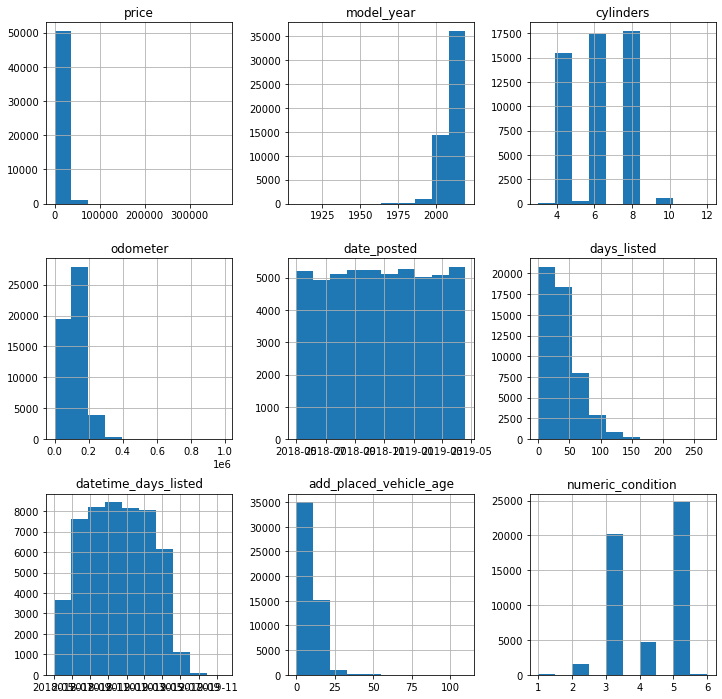

In [60]:
#
data.hist(figsize=(12,12))


In [61]:
data['date_posted']

0       2018-06-23
1       2018-10-19
2       2019-02-07
3       2019-03-22
4       2019-04-02
           ...    
51520   2018-10-03
51521   2018-11-14
51522   2018-11-15
51523   2018-07-02
51524   2018-06-05
Name: date_posted, Length: 51525, dtype: datetime64[ns]

TypeError: numpy boolean subtract, the `-` operator, is not supported, use the bitwise_xor, the `^` operator, or the logical_xor function instead.

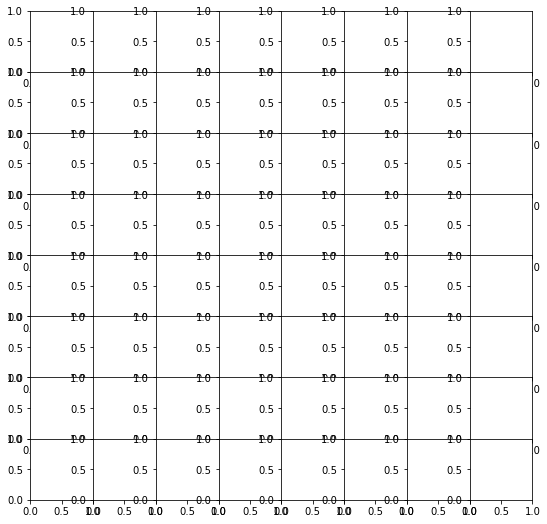

In [62]:
pd.plotting.scatter_matrix(data, figsize=(9, 9))

In [ ]:
#



In [ ]:
#



In [ ]:
#



## Study and treat outliers

[Given the results above, determine what columns may contain outliers, and create a DataFrame without those outliers. Hint: Outliers can be identified by defining the lower/upper limits for normal range of values.]

In [ ]:
# Determine the lower limits for outliers



In [ ]:
# Determine the upper limits for outliers



In [ ]:
# Store data without outliers in a separate DataFrame



## Study core parameters without outliers

[Use the filtered data to make new plots. Compare with the earlier ones (that included outliers). Draw conclusions for each.]

## Ads lifetime

[Study how many days advertisements were displayed (`days_listed`). Calculate the mean and median. Describe the typical lifetime of an ad. Determine when ads were removed quickly, and when they were listed for an abnormally long time.]

## Average price per each type of vehicle

[Analyze the number of ads and the average price for each type of vehicle. Plot a graph showing the dependence of the number of ads on the vehicle type. Select the two types with the greatest number of ads.]

## Price factors

[What factors impact the price most? Take each of the popular types you detected at the previous stage and study whether the price depends on age, mileage, condition, transmission type, and color. For categorical variables (transmission type and color), plot box-and-whisker charts, and create scatterplots for the rest. When analyzing categorical variables, note that the categories must have at least 50 ads; otherwise, their parameters won't be valid for analysis.]

[Make use of correlation matrix and correlation plots]

## General conclusion

[List your important conclusions in this final section, make sure they include those that led you to the way you processed and analyzed the data. Cover the missing values, duplicates, outliers and possible reasons and solutions for problematic artifacts that you had to address. Don't forget to remove all bracketed comments before submitting your project.]

end of chapter feedback:
1) On the data_coworking_space calindar, the times are written into the title, but not stored natively in the calendar format.  This make it more difficult to copy over to our calendar.  Google Calindar has both time and timezone fields, if it was filled in correctly, it would save multiple steps when transposing the weekly calinar from the community cal, to our personal cal.

1.B) The lack of calindar invites for events continues to perplex, as this is the international business standard.

2) The lack of guidance on the "Study core parameters" section above left me grasping for next steps. While it sent me back searching though the lessons for direction, it was a jaring and abupt shift, as I'm still trying to integrate both code and theory.

3) The program has great tools for solving specific code challenges and problems, but the tudoring and office hours format isn't a great setup for building the conceptional and theoretical framework needed to be a competent datascience. At the least, I personally find myself strugging in this reguard.a link

4) 